In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_excel('/content/Airbnb_Open_Data.xlsx')

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [8]:
# 1. Drop duplicate records
df.drop_duplicates(inplace=True)

# 2. Drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# 3. Rename columns for clarity
df.rename(columns={'price': '$price', 'service fee': '$service_fee'}, inplace=True)

# 4. Drop all records with missing values
df.dropna(inplace=True)

# 5. Convert mismatched datatypes
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')  # safe conversion
df['Construction year'] = df['Construction year'].astype(int)

# 6. Correct spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'].str.lower() == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# 7. Remove outliers in 'availability 365'
df = df[df['availability 365'] <= 500]


In [9]:
df.duplicated().value_counts()

,count
False,83389


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

EDA

In [11]:
df.describe()

,lat,long,instant_bookable,Construction year,$price,$service_fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


What are the different property types in the Dataset?

In [12]:
property_types = df['room type'].value_counts().to_frame()
print(property_types)

                 count
room type             
Entire home/apt  44161
Private room     37474
Shared room       1646
Hotel room         108


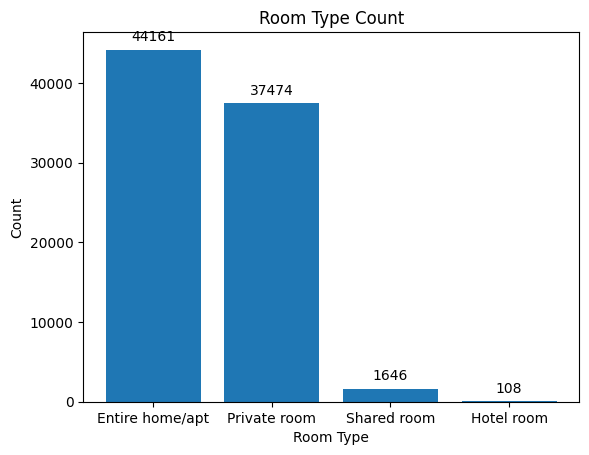

In [14]:
#Room type count plotted on a barchart
room_type_counts = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_counts, labels= property_types.loc[:, "count"], padding=4);
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Count')
plt.show()

Which neighborhood group has the highest number of listings?

In [15]:
neighbourhood_group_counts = df['neighbourhood group'].value_counts().to_frame()
print(neighbourhood_group_counts)

                     count
neighbourhood group       
Brooklyn             34622
Manhattan            34560
Queens               11124
Bronx                 2267
Staten Island          816


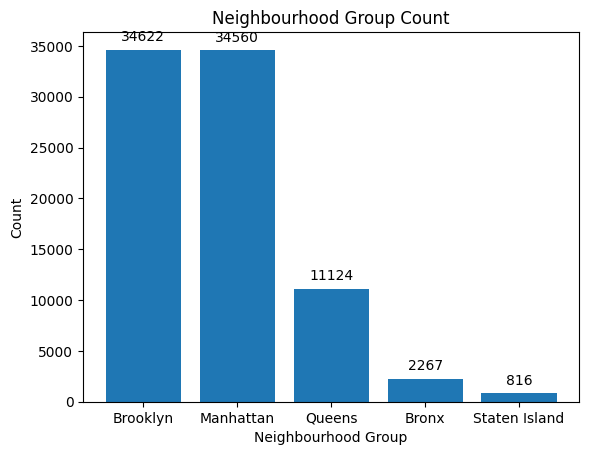

In [19]:
neighbourhood_group_counts = df['neighbourhood group'].value_counts()

# Step 2: Plot and store bars separately (don’t overwrite the counts variable!)
bars = plt.bar(neighbourhood_group_counts.index, neighbourhood_group_counts.values)

# Step 3: Add bar labels using the counts
plt.bar_label(bars, labels=neighbourhood_group_counts.values, padding=4)

# Step 4: Add labels and title
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Neighbourhood Group Count')
plt.show()

Which neighborhoods group have the highest average prices for Airbnb listings?

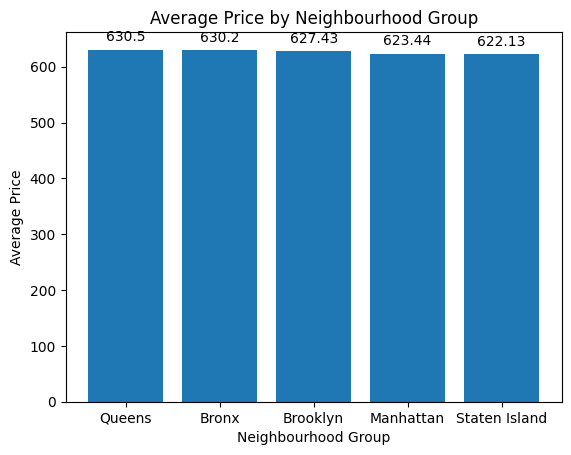

In [22]:
#Which neighborhoods group have the highest average prices for Airbnb listings?
neighbourhood_group_prices = df.groupby('neighbourhood group')['$price'].mean().sort_values(ascending= False).to_frame()
avg_price_bar = plt.bar(neighbourhood_group_prices.index, neighbourhood_group_prices.loc[:,"$price"]);
plt.bar_label(avg_price_bar, labels=  round(neighbourhood_group_prices.loc[:, "$price"],2), padding=4);
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price by Neighbourhood Group')
plt.show()


Is there a relationship between the construction year of property and price?

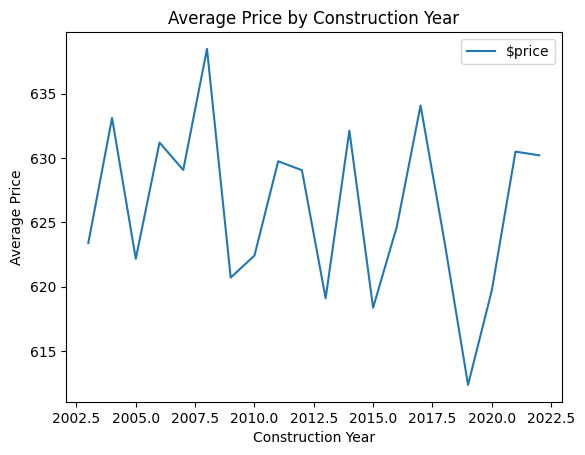

In [23]:
# Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['$price'].mean().to_frame().plot(kind='line')
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.title('Average Price by Construction Year')
plt.show()

Who are the top 10 hosts by calculated hoat listing count?

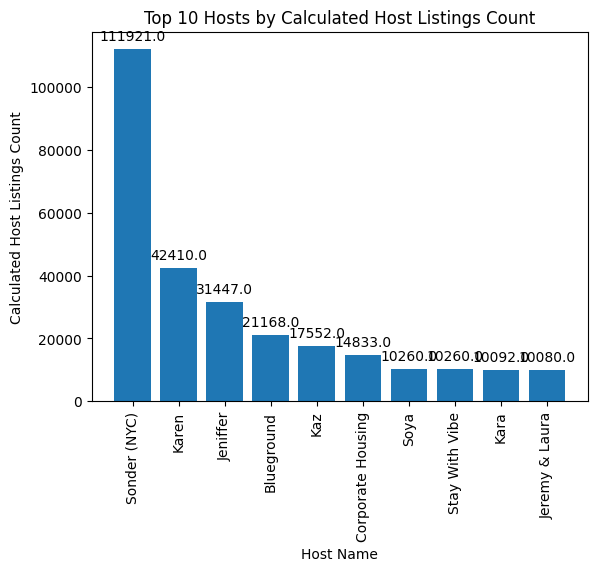

In [26]:
# Who are the top 10 hosts by calculated hoat listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending= False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:,"calculated host listings count"]);
plt.bar_label(hosts_bar, labels=  hosts.loc[:, "calculated host listings count"], label_type='edge', padding=4);
plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=90)
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.show()


Are hosts with verified identities more likely to receive positive reviews?

In [29]:
#Are hosts with verified identities more likely to receive positive reviews?
hosts_verified = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
hosts_verified

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


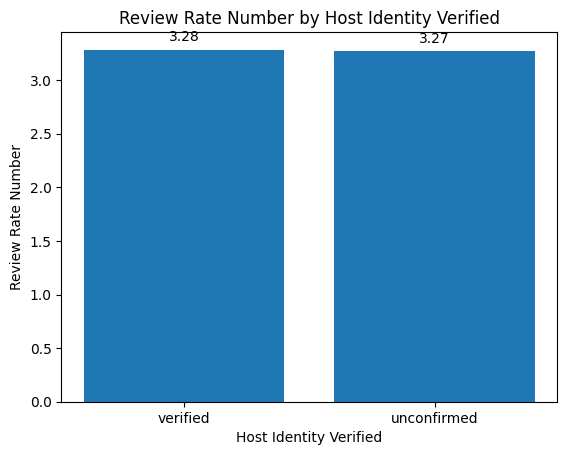

In [30]:
hosts_verified_bar = plt.bar(hosts_verified.index, hosts_verified.loc[:,"review rate number"]);
plt.bar_label(hosts_verified_bar, labels=  round(hosts_verified.loc[:, "review rate number"],2), padding=4);
plt.xlabel('Host Identity Verified')
plt.ylabel('Review Rate Number')
plt.title('Review Rate Number by Host Identity Verified')
plt.show()

Is there a correlation between te price of a listing and its service fee?

In [31]:
# Is there a correlation between te price of a listing and its service fee?
df['$price'].corr(df['$service_fee'])

np.float64(0.9999909082976466)

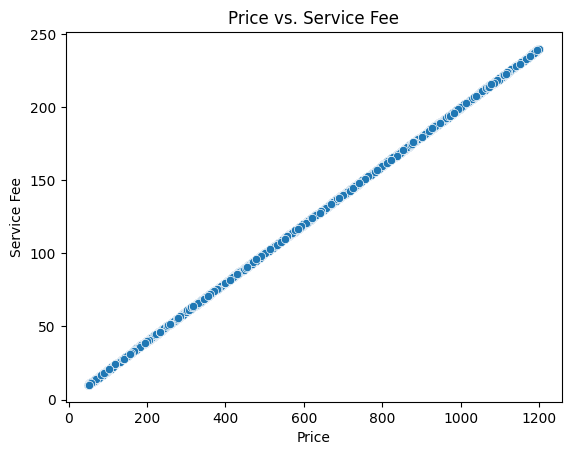

In [32]:
sns.scatterplot(data=df, x='$price', y='$service_fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.title('Price vs. Service Fee')
plt.show()


What is the average review rate number(e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [33]:
# What is the average review rate number(e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
avg_review_rate = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
avg_review_rate

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274773
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285431
                    Shared room                3.261976
Queens              Entire home/apt            3.349528
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

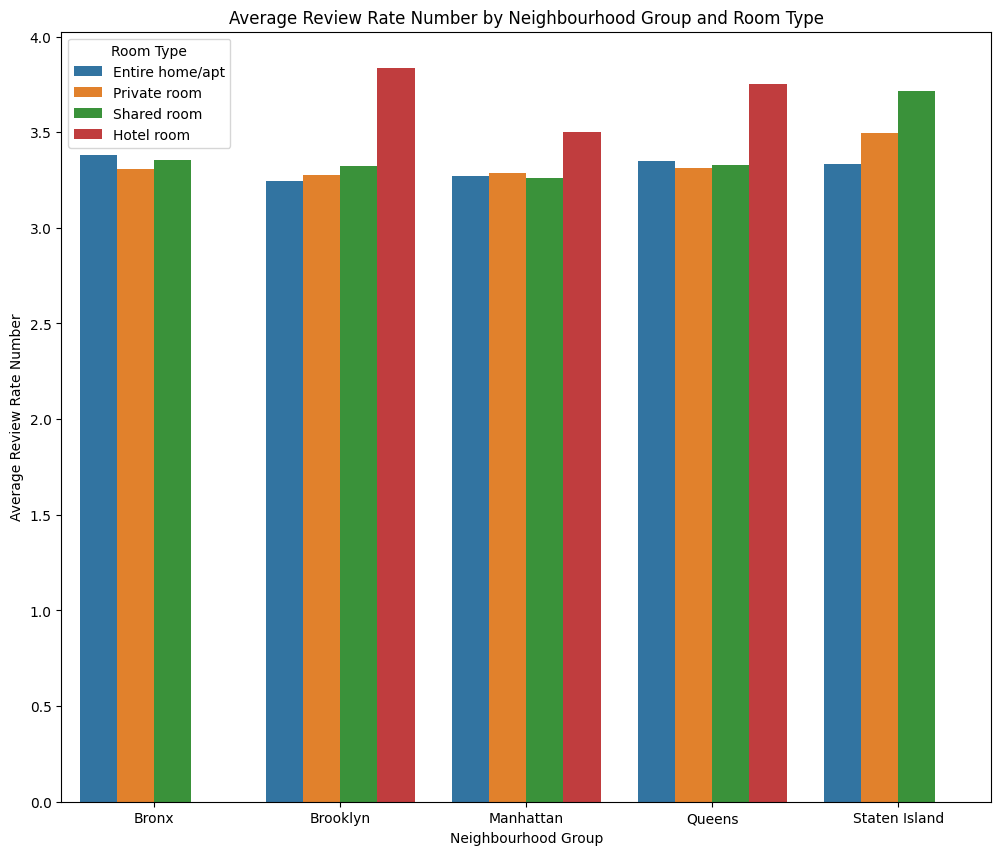

In [34]:
plt.figure(figsize=(12, 10))
sns.barplot(data=avg_review_rate, x='neighbourhood group', y='review rate number', hue='room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number by Neighbourhood Group and Room Type')
plt.legend(title='Room Type')
plt.show()

Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

Text(0.5, 1.0, 'Calculated Host Listings Count vs. Availability 365')

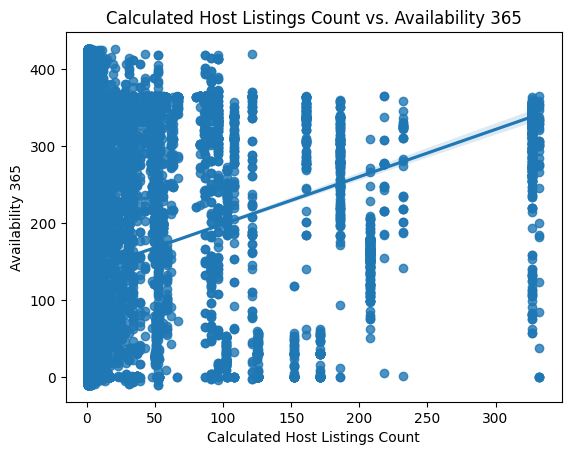

In [35]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(data=df, x='calculated host listings count', y='availability 365')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('Calculated Host Listings Count vs. Availability 365')

In [36]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1359971471570339)